In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
columns = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=columns)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [5]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
movie_data = pd.merge(left=df, right=movie_titles, on='item_id')

In [7]:
movie_data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
title        100003 non-null object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [9]:
movie_data.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [10]:
#count the lowest and highest repeated number of movies 
movie_data.title.value_counts().sort_values()

Small Faces (1995)                 1
Someone Else's America (1995)      1
Bird of Prey (1996)                1
Woman in Question, The (1950)      1
Farmer & Chase (1995)              1
                                ... 
Liar Liar (1997)                 485
Return of the Jedi (1983)        507
Fargo (1996)                     508
Contact (1997)                   509
Star Wars (1977)                 584
Name: title, Length: 1664, dtype: int64

In [11]:
#highest and lowest rating of movies
movie_data.groupby(by='title').rating.mean().sort_values()

title
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Butterfly Kiss (1995)                           1.0
Daens (1992)                                    1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
                                               ... 
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
Santa with Muscles (1996)                       5.0
Prefontaine (1997)                              5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Name: rating, Length: 1664, dtype: float64

In [12]:
#movie average ratings
movie_ratings = pd.DataFrame(movie_data.groupby('title').mean().rating)

In [13]:
#number of ratings column
movie_ratings['num_of_ratings'] = pd.DataFrame(movie_data.groupby('title').count().user_id)

In [14]:
movie_ratings.num_of_ratings.sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: num_of_ratings, dtype: int64

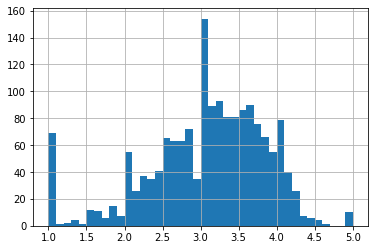

In [15]:
movie_ratings.rating.hist(bins=40)

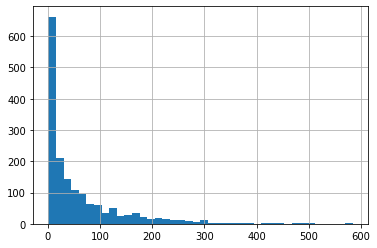

In [16]:
movie_ratings.num_of_ratings.hist(bins=40)

In [17]:
movie_mat = pd.pivot_table(movie_data, values='rating', index='user_id', columns='title')

In [18]:
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
star_wars = movie_mat['Star Wars (1977)']

In [20]:
similar_to_starwars = movie_mat.corrwith(star_wars)

/home/sandesh/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/sandesh/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [21]:
df_starwars = pd.DataFrame(similar_to_starwars, columns=['correlation'])
# df_starwars.dropna(inplace=True)

In [22]:
df_starwars.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [23]:
df_starwars['num_of_ratings'] = movie_ratings.num_of_ratings
df_starwars.dropna(inplace=True)

In [24]:
df_starwars.head()

,correlation,num_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [25]:
#most similar movies with star wars
df_starwars.sort_values(by='correlation', ascending=False, inplace=True)
df_starwars[df_starwars.num_of_ratings > 100].head()

,correlation,num_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
